In [6]:
import pandas as pd 
dataset = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [7]:
dataset.shape

(14940, 16)

In [8]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

word_freq=gen_freq(dataset.text.str)
word_freq

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Length: 19601, dtype: int64

In [9]:
!pip install wordcloud

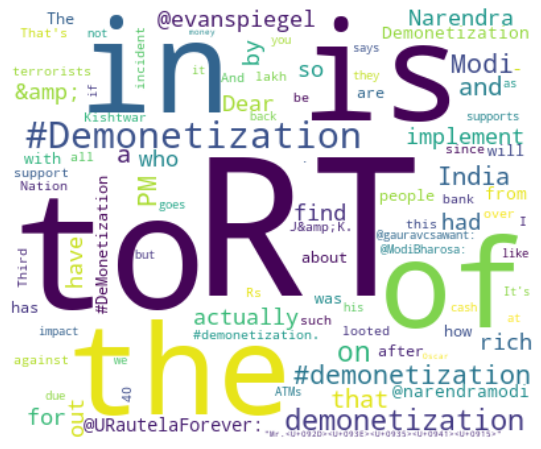

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, 
        background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
     #Fix %
    text = re.sub(r'%', '', text)
    
    return text

In [12]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'could', "mustn't", "shouldn't", 'they', 'very', 'otherwise', 'then', 'her', 'more', "shan't", 'do', 'what', 'in', 'but', 'yours', 'k', "i've", 'after', 'each', 'his', 'which', "how's", 'about', 'him', 'over', "haven't", "they've", 'same', 'am', 'ought', "you'll", 'against', "wasn't", "she's", "when's", 'most', "she'd", "they're", 'does', 'them', 'should', "what's", 'get', 'an', 'shall', 'from', 'ever', 'our', 'all', "she'll", 'because', "we'd", 'had', 'however', 'that', "let's", 'doing', "he's", 'myself', 'and', "weren't", 'did', 'my', 'on', 'you', "that's", "he'd", 'she', 'if', 'up', "i'll", 'whom', 'like', "can't", 'he', 'is', 'has', 'have', 'too', 'out', 'by', "they'll", 'yourselves', "where's", "you're", "doesn't", 'having', "won't", 'so', 'until', "it's", 'just', 'been', 'would', 'nor', 'themselves', 'these', 'the', 'for', 'how', 'http', 'com', "i'd", 'me', 'through', 'we', 'both', 'of', 'itself', 'some', "who's", 'further', 'why', 'www', "didn't", 'where', "you'd", 'with', 'off

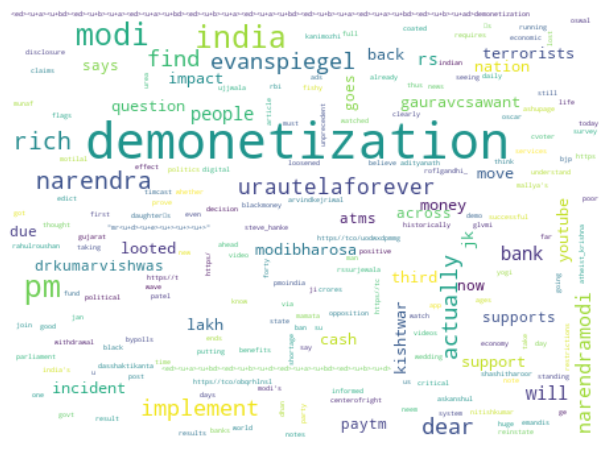

In [14]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, 
               background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()